# The Movies Database Presentation
## Fatimah Ehab Farouk

## Investigation Overview

Inspired by my passion for art and cinema, and my enthusiasm for data analysis, I decided to tackle the topic of movies as an EDA (Exploratory Data Analysis) project, focusing on my data visualization skills. I wanted  to discover insights related to cinema from the social and cultural perspectives. Through numerable steps of data wrangling and data visualization, I found some intriguing insights.


## Dataset Overview
It's a movie dataset that contains metadata for all 45,000 movies listed in the Full MovieLens Dataset for movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages will be wrangled and analyzed visually, then presented in explanatory visualizations. You can check the Dataset on Kaggle from [here](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv).


### Data Dictionary
- **adult**: Indicates if the movie is X-Rated or Adult. 
- **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to. 
- **budget**: The budget of the movie in dollars. 
- **genres**: A stringified list of dictionaries that list out all the genres associated with the movie. 
- **homepage**: The Official Homepage of the move. 
- **id**: The ID of the move. 
- **imdb_id**: The IMDB ID of the movie. 
- **original_language**: The language in which the movie was originally shot in. 
- **original_title**: The original title of the movie. 
- **overview**: A brief blurb of the movie. 
- **popularity**: The Popularity Score assigned by TMDB. Learn more about how it's calculated [here](https://developers.themoviedb.org/3/getting-started/popularity).
- **poster_path**: The URL of the poster image. 
- **production_companies**: A stringified list of production companies involved with the making of the movie. 
- **production_countries**: A stringified list of countries where the movie was shot/produced in. 
- **release_date**: Theatrical Release Date of the movie. 
- **revenue**: The total revenue of the movie in dollars. 
- **runtime**: The runtime of the movie in minutes. 
- **spoken_languages**: A stringified list of spoken languages in the film. 
- **status**: The status of the movie (Released, To Be Released, Announced, etc.) 
- **tagline**: The tagline of the movie. 
- **title**: The Official Title of the movie. 
- **video**: Indicates if there is a video present of the movie with TMDB. 
- **vote_average**: The average rating of the movie. 
- **vote_count**: The number of votes by users, as counted by TMDB.
- **cast**: A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
- **crew**: A stringified list of dictionaries consisting of crew names and the function they performed.


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image, HTML
import json
import datetime
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
# Import the meta data CSV file as a Pandas dataframe
movies = pd.read_csv('movies_clean.csv')
# Make sure it was imported successfully
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                9778 non-null   object 
 1   id                    9778 non-null   int64  
 2   original_language     9778 non-null   object 
 3   original_title        9778 non-null   object 
 4   overview              9778 non-null   object 
 5   popularity            9778 non-null   float64
 6   poster_path           9778 non-null   object 
 7   production_companies  9778 non-null   object 
 8   production_countries  9778 non-null   object 
 9   release_date          9778 non-null   object 
 10  runtime               9778 non-null   float64
 11  spoken_languages      9778 non-null   int64  
 12  title                 9778 non-null   object 
 13  vote_average          9778 non-null   float64
 14  vote_count            9778 non-null   float64
 15  cast                 

## Cinema in Cultural Eyes

Cinema is an art. And art is used to express feelings, ideas and theories. Art can reflect reality, and can divert from it, but most importantly it's a representation of the experience and culture accumulation of the person/group creating the piece of art. One film takes multiple people to create it, so the more diverse the group is, the more it's representative of diverse ideas and feelings, thus cultures or different cultural ways of thinking about the same thing. Take for example mourning and grief. It's a universal feeling, yet its representation is different a movie like [Maborosi](https://letterboxd.com/film/maborosi/) than [Hiroshima Mon Amour](https://letterboxd.com/film/hiroshima-mon-amour/) or [Blue](https://letterboxd.com/film/three-colors-blue/). Culture plays a huge role in how any idea is portrayed through art and specifically cinema. That's why my presentation will focus on cultural aspects trying to answer the question of ***did filmmaking and cinema evolved culturally and socially since its beginning till recent years?***

## The Beginning

> "Cinema is an art form that is designed to go across borders. And as a filmmaker, the only way I can direct a movie is when I feel close to my culture."
  -Denis Villeneuve, the French Canadian film director.

Let's go back to the starting point and see when did filmmaking start.

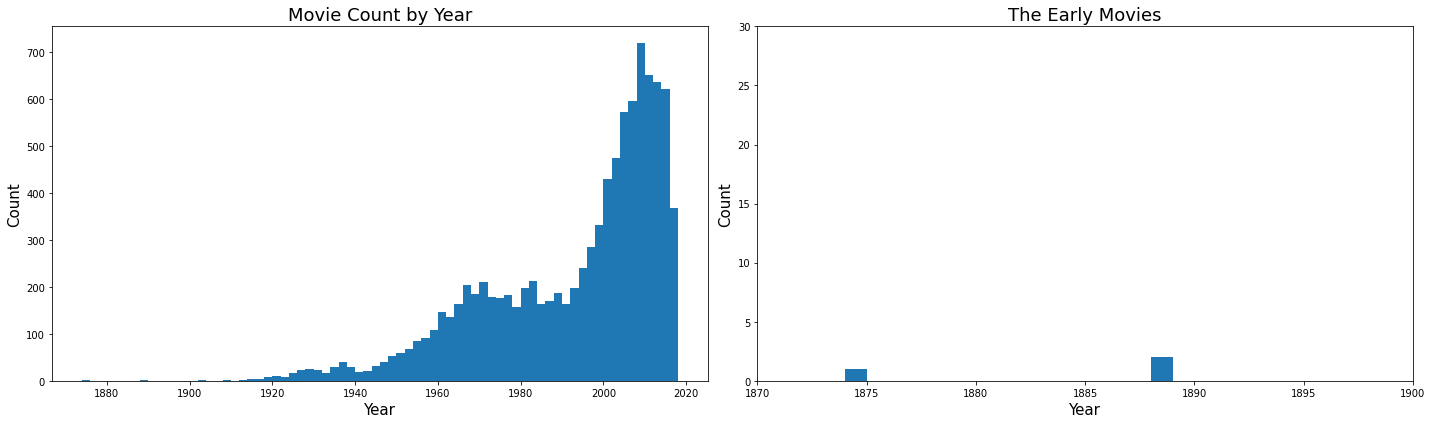

In [24]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
bins = np.arange(movies.year.min(), movies.year.max() + 2, 2)
plt.hist(movies.year, bins=bins)
plt.title('Movie Count by Year', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(1,2,2)
bins = np.arange(movies.year.min(), movies.year.max() + 1, 1)
plt.hist(movies.year, bins=bins)
plt.title('The Early Movies', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim((1870,1900))
plt.ylim((0,30))

plt.tight_layout()
plt.show()

Three of the earliest movies in history were made before 1890. They were 2 documentary short films *Passage of Venus and Traffic Crossing Leeds Bridge* and one silent short film *Accordion Player*, resembling the first trials of creating a film. By time and as it shows films began to increase due to technological developments in cinema. And since the 21th century cinema has evolved incredibly, so let's take a cultural look on this progress.

## Original Language in Films

The basic representation of culture and main way of communication is the modern ages is *language*, so let's check the top languages represented in film.

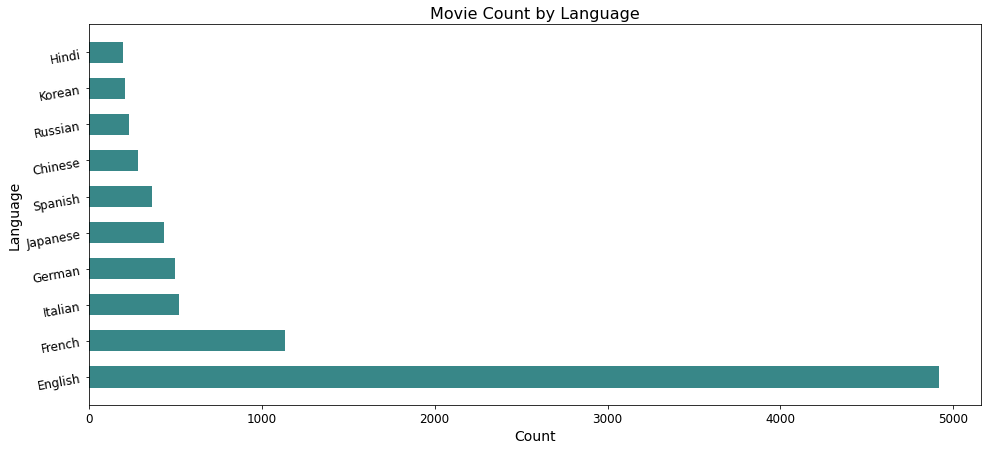

In [14]:
plt.figure(figsize=[16,7])
top_languages = movies.original_language.value_counts().head(10)
labels =[]
top_languages_count=[]

for label, count in enumerate(top_languages.index.tolist()):
    labels.append(label)
    top_languages_count.append(count)
    
plt.barh(top_languages_count, top_languages, height=0.6, color="#388788")

plt.title('Movie Count by Language', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Language', fontsize=14)
plt.yticks(fontsize= 12, rotation=10)
plt.xticks(fontsize= 12);

The first place is expectedly English with almost 5000 movies *(remember our dataset has abouy 9800 movies)*, while the second place falls far behind for about 1200 movies and goes to the French movies, the third to Italian, the fourth to German, and the fifth to Japanese movies. Then comes Spanish, Chinese, Russian, Korean and Hindi.

Despite the progress of filmmaking, many languages aren't represented as much as others. The barrier of language makes it harder to produce companies to produce movies with local languages or even accents, but as the Korean filmmaker *Bong Joon Ho* said:

> "*Once you overcome the one-inch tall barrier of subtitles, you will be introduced to so many more amazing films.*"

## Spoken Languages in Film

Let's take a look on the number of languages spoken in films. It can represent culture diversity in cinema.

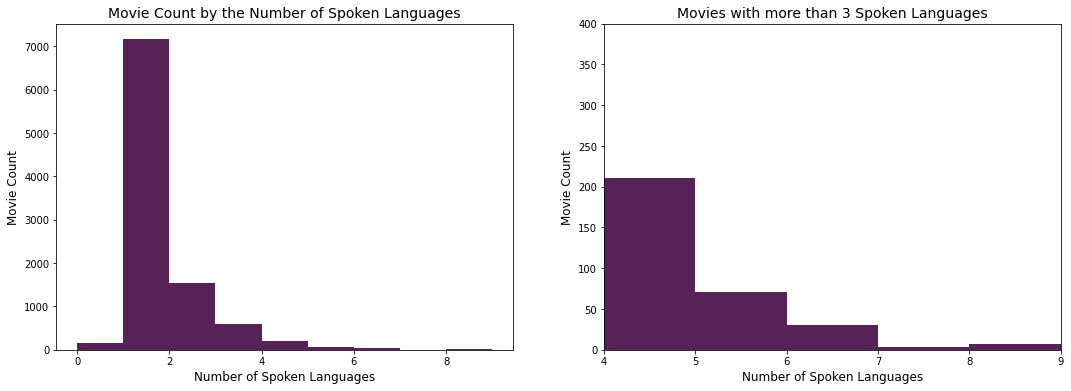

In [17]:
# Bar plot for spoken languages
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
bins = np.arange(movies.spoken_languages.min(), movies.spoken_languages.max()+1, 1)
plt.hist(data=movies, x='spoken_languages', bins=bins, color='#552355')
plt.title('Movie Count by the Number of Spoken Languages', fontsize= 14)
plt.xlabel('Number of Spoken Languages', fontsize= 12)
plt.ylabel('Movie Count', fontsize= 12);

# Histogram focusing on movies with more than 3 languages
plt.subplot(1,2,2)
bins = np.arange(movies.spoken_languages.min(), movies.spoken_languages.max()+1, 1)
plt.hist(data=movies, x='spoken_languages', bins=bins, color='#552355')
plt.xlim((4,9))
plt.ylim((0,400))
plt.title('Movies with more than 3 Spoken Languages', fontsize= 14)
plt.xlabel('Number of Spoken Languages', fontsize= 12)
plt.ylabel('Movie Count', fontsize= 12);

Most movies have only one language. Movies with zero languages are silent movies. As the number of languages spoken in a movie increase, the count of movies decrease. There are movies so multi-cultural that they have like 9 different languages spoken in them. Let's check these.

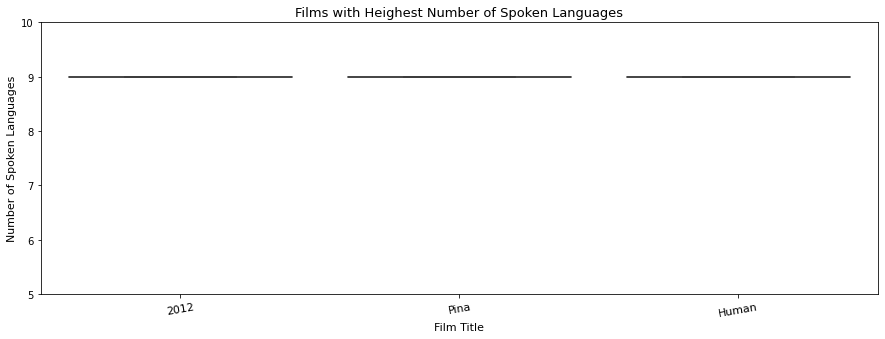

In [19]:
# Create a dataframe of multi cultrual movies
plt.figure(figsize=[15,5])
multiculture = movies[movies.spoken_languages > 8]
# Plot
sb.boxplot(data=multiculture, x='title', y='spoken_languages')

plt.ylim((5,10))
plt.xticks(fontsize= 11, rotation=10)
plt.title('Films with Heighest Number of Spoken Languages', fontsize= 13)
plt.xlabel('Film Title', fontsize= 11)
plt.ylabel('Number of Spoken Languages', fontsize= 11);

The top 3 films capturing as many as NINE different languages are:
- [Pina](https://letterboxd.com/film/pina/) by Wim Wenders
- [Human](https://letterboxd.com/film/human-2015/) by Yann Arthus-Bertrand
- [2012](https://letterboxd.com/film/2012/) by Roland Emmerich

Now let's observe another cultural aspect that is strongly related to society.

## Gender in Film

How are women and men represented in filmmaking in cinema?

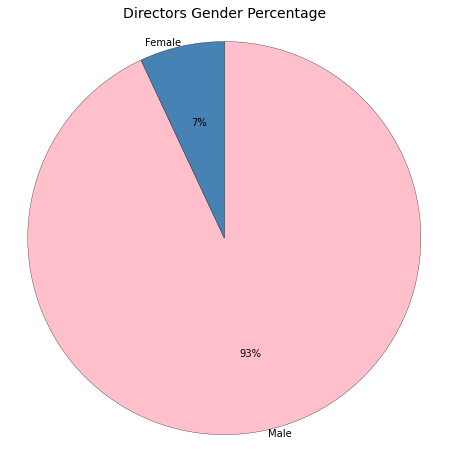

In [22]:
# Pie plot of director gender
sorted_counts = movies.director_gender.value_counts()
labels = sorted_counts.index.str.capitalize()

plt.figure(figsize=[8,8])
plt.pie(sorted_counts, labels=labels, startangle=90, counterclock=False, autopct='%1.00f%%',
        labeldistance= 1.02, colors=["pink", "steelblue"], wedgeprops = {'linewidth': 0.3, 'edgecolor': 'black'})
plt.axis('square')
plt.title('Directors Gender Percentage', pad=3, fontsize=14);

The graph shows that the average number of male directors are far bigger *about 93%* than the average number of female directors *about 7%*. This is a huge gap and needs more elaboration.

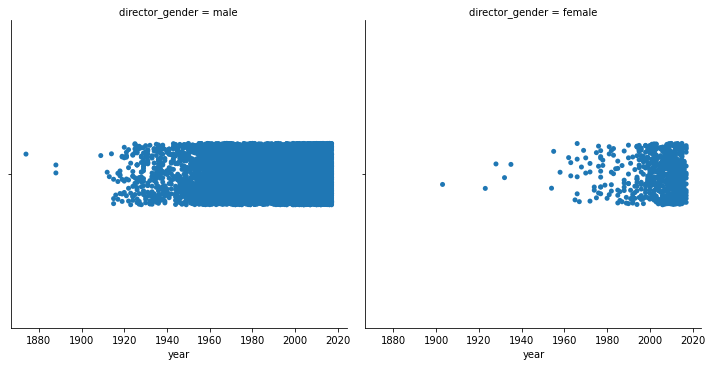

In [29]:
# Check director's gender vs year
sb.catplot(x="year", hue="director_gender", col="director_gender", data=movies, kind="strip", legend=True)
plt.show();

It's apparent that women are a minority in the filmmaking industry worldwide. But we can notice a shifting  increase in 2000 and upward. Women need more space to contribute in cinema. Their perspective in such a form of art is significant.

> "*I didn't see myself as a woman doing film but as a radical film-maker who was a woman.*" - *Agnes Varda*


## Conclusion
Yes, indeed film industry evolved culturally over time to contain more languages and give more space to divese cultures to engage with it. However, women are underrepresented in cinema. They got to be more involved in the film industry, not just in filmmaking, but all roles, including cinematographers, film producers, film critics, and other film industry professions.

Let me end the presentation with one last quote:

> "*The whole aspect of cinema and film festivals should be a moment to come together and celebrate art and humanity. It would be a shame if there was such a divide.*" -*Keanu Reeves*
